In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import time

In [60]:
data=pd.read_csv('C:/Users/Lenovo/Desktop/1.csv',header=None)

In [61]:
data=data.loc[:750,4]

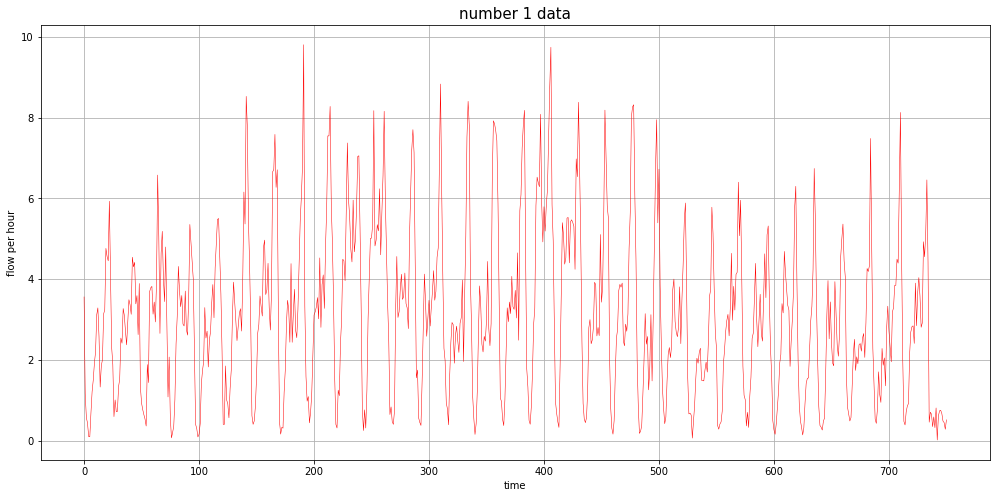

In [62]:
import matplotlib.pyplot as plt
x=np.arange(751)
plt.figure(figsize=(17,8))
plt.plot(x,data,color='red',linewidth=0.5,linestyle='-',label='down')
plt.yticks(np.arange(0,11,2))
plt.xticks(range(0,800,100))
plt.title("number 1 data",fontsize='15')
plt.xlabel("time")
plt.ylabel('flow per hour')
#plt.tick_params(labelsize=5)
plt.grid()
plt.savefig("1.jpg",dpi=175)
plt.show()

In [63]:
data=pd.DataFrame(data)
data=data.values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

In [64]:
train_size = int(len(data)*0.8)
test_size = len(data)-train_size
train, test = data[0: train_size], data[train_size: len(data)]

In [65]:
def creat_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i: (i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)

In [71]:
look_back =14
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)

In [72]:
model = Sequential()

model.add(LSTM(input_dim=1, units=50, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(input_dim=50, units=100, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(input_dim=100, units=200, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Dense(units=1))

model.add(Activation('relu'))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout (Dropout)            (None, None, 50)          0         
_________________________________________________________________
lstm_21 (LSTM)               (None, None, 100)         60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
lstm_22 (LSTM)               (None, None, 200)         240800    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 300)              

In [73]:
history = model.fit(trainX, trainY, batch_size=30,epochs=100, 
                    validation_split=0.1, verbose=2)
print('compilatiom time:', time.time()-start)

Epoch 1/100
18/18 - 14s - loss: 0.0677 - val_loss: 0.0275
Epoch 2/100
18/18 - 1s - loss: 0.0471 - val_loss: 0.0281
Epoch 3/100
18/18 - 1s - loss: 0.0471 - val_loss: 0.0311
Epoch 4/100
18/18 - 2s - loss: 0.0466 - val_loss: 0.0318
Epoch 5/100
18/18 - 2s - loss: 0.0468 - val_loss: 0.0226
Epoch 6/100
18/18 - 2s - loss: 0.0487 - val_loss: 0.0302
Epoch 7/100
18/18 - 1s - loss: 0.0470 - val_loss: 0.0449
Epoch 8/100
18/18 - 2s - loss: 0.0470 - val_loss: 0.0381
Epoch 9/100
18/18 - 2s - loss: 0.0465 - val_loss: 0.0347
Epoch 10/100
18/18 - 2s - loss: 0.0446 - val_loss: 0.0298
Epoch 11/100
18/18 - 2s - loss: 0.0457 - val_loss: 0.0283
Epoch 12/100
18/18 - 2s - loss: 0.0460 - val_loss: 0.0218
Epoch 13/100
18/18 - 2s - loss: 0.0459 - val_loss: 0.0271
Epoch 14/100
18/18 - 2s - loss: 0.0434 - val_loss: 0.0283
Epoch 15/100
18/18 - 2s - loss: 0.0440 - val_loss: 0.0258
Epoch 16/100
18/18 - 2s - loss: 0.0416 - val_loss: 0.0245
Epoch 17/100
18/18 - 2s - loss: 0.0394 - val_loss: 0.0222
Epoch 18/100
18/18 - 2

In [58]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [42]:
#测试

In [43]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [44]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Test Sccore %.2f RMSE' %(testScore))

Train Sccore 0.98 RMSE
Test Sccore 1.12 RMSE


In [45]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (data.shape[0], 1))
trainPredictPlot[look_back: len(trainPredict)+look_back, :] = trainPredict

In [46]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (data.shape[0], 1))
testPredictPlot[len(trainPredict)+(look_back*2)+1: len(data)-1, :] = testPredict

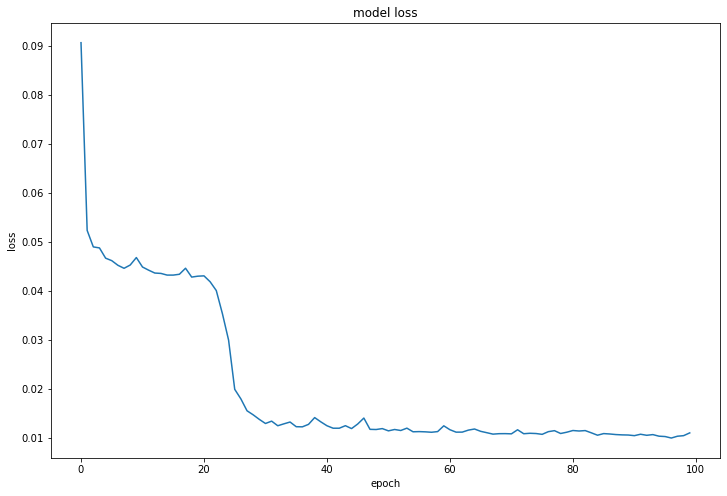

In [47]:
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

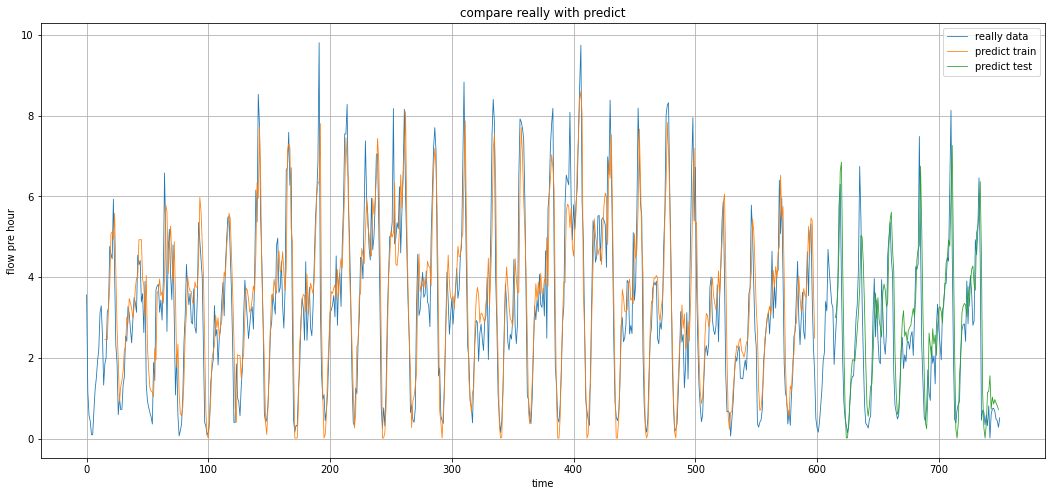

In [48]:
fig2 = plt.figure(figsize=(18,8))
l1,=plt.plot(scaler.inverse_transform(data),linewidth=0.8)
l2,=plt.plot(trainPredictPlot,linewidth=0.8)
l3,=plt.plot(testPredictPlot,linewidth=0.8)
plt.title('compare really with predict')
plt.ylabel('flow pre hour')
plt.xlabel('time')
plt.grid()
plt.legend(handles=[l1,l2,l3],labels=['really data','predict train','predict test'],loc='best')
plt.savefig("对比.jpg",dpi=175)
plt.show()